**Question 1**
**(a)**
$$
Q 
= 
\begin{bmatrix}
    0 & 0_{d}^T\\
    0_{d} & I_{d}
\end{bmatrix}_{(d+1)x(d+1)}
%
\;
u =
\begin{bmatrix}
    b\\
    w_1\\
    .\\
    .\\
    .\\
    w_d
\end{bmatrix}_{(d+1)x1}
$$
\
$$
u^TQu = 
\begin{bmatrix}
    b\:
    w
\end{bmatrix}
%
\begin{bmatrix}
    0 & 0_{d}^T\\
    0_{d} & I_{d}
\end{bmatrix}
%
\begin{bmatrix}
    b\\
    w
\end{bmatrix}
$$
\
$$
u^TQ = 
\begin{bmatrix}
    0 & w_1 &.&.&.&w_d
\end{bmatrix}
$$
$$
u^TQu = 
\begin{bmatrix}
    0 & w_1 &.&.&.&w_d
\end{bmatrix}
%
\begin{bmatrix}
    b\\
    w_1\\
    .\\
    .\\
    .\\
    w_d
\end{bmatrix}
$$

$$
u^TQu = 
\begin{bmatrix}
    0 + w_1^2 + w_2^2+...+w_d^2
\end{bmatrix}
= [w^2] \geq0
$$

**Question 1**
**(b)**
$$
x_1 = [0, 0] \; y_1 = -1
\\
x_2 = [0, -1] \; y_2 = -1
\\
x_3 = [-2, 0] \; y_3 = +1
$$
\
$$ min \dfrac{1}{2} w^Tw = \dfrac{1}{2} (w_1^2+w_1^2)$$


subject to$$ y_n(w^T x_n +b) \geq1$$

From the constraint above
$$ -b \geq 1 \;\;\;\;\;\;\;\;\;\;\;\;\; (1)\\
(w_2-b)\geq 1 \;\;\;\;\;\; (2)\\
(-2w_1+b) \geq 1 \;\;\; (3) $$
From (1) and (3):$$w_1 \leq -1$$
From (1) and (2):$$b \leq -1$$ and $$w_2\geq 1+b$$ Thus,
$$w_2 \geq 0$$
To make  $\dfrac{1}{2} w^Tw = \dfrac{1}{2} (w_1^2+w_1^2)$ minimum, the $b$,$w_1$ and $w_2$ are chosen as
$b=-1$, $w_1=-1$ and $w_2=0$ (the optimum solution)


From these w and b, Optimal Hyperplane is:$$g(x) =sign(x_1-1) $$
And the margin is: $$ \dfrac{1}{\|w\|} = \dfrac{1}{\sqrt{(-1)^2+0}}=1$$

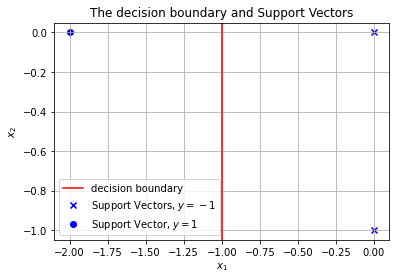

In [2]:
import matplotlib.pyplot as plt
plt.axvline(x=-1,c='r',linestyle='-')
plt.scatter([0,0],[0,-1],c='b', marker='x')
plt.scatter(-2,0,c='b', marker='o')
plt.title('The decision boundary and Support Vectors')
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.legend(["decision boundary", "Support Vectors, $y=-1$","Support Vector, $y=1$"], loc ="lower left")
plt.grid()
plt.show()

## Question 1.c

In [3]:
import numpy as np
import cv2

In [4]:
from cvxopt import matrix, solvers

X = np.array([[0,0],[0,-1],[-2,0]])
y = np.array([-1,-1,+1]).reshape((-1,1))

Q = np.identity(X.shape[1]+1)
Q[0,0] = 0
Q = matrix(Q)

p = np.zeros((X.shape[1]+1,1))
p = matrix(p)

A = y*X
A = np.hstack((y,A))
A = matrix(A)*-1.0

c = -np.ones((y.shape[0],1))
c = matrix(c)

In [5]:
solvers.options['show_progress'] = False
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

sol=solvers.qp(Q,p, A, c)
b = sol['x'][0]
w = sol['x'][1:]
print("bias:")
print(b)
print("weights:")
print(w)

bias:
-1.0000000000040985
weights:
[-1.00e+00]
[ 7.97e-06]



As seen from the results above bias is approximately $-1$, $w_1$ is $-1$ and $w_2$ is a very small value which is approximately $0$.

## Question 1.d

In [6]:
# load the y_train and y_test to use in the program
y_train = np.load('orientations_train.npy')
y_test = np.load('orientations_test.npy')

#since it is a classification problem, y_train and y_test are label encoded. Thus, the float numbers in y_train and y_test are
#turned to integers. since there are 15 different number in y_train and y_test, there are 15 classes
#with label encoding the classes are encoded as integer numbers starting from 0 to 14(included)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# create a matrix to store the training image data, a row for every data sample
x_train=np.empty((10000,4096))
main_path='3dshapes_train/'
jpg='.jpg'
for i in range(10000):
    conv = str(i)
    path = main_path+conv+jpg
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = img.flatten()
    x_train[i]=img
    
# test data is load like the training data
x_test=np.zeros((1000,4096))
main_path2='3dshapes_test/'
for i in range(1000):
    conv = str(i)
    path = main_path2+conv+jpg
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = img.flatten()
    x_test[i]=img

In [7]:
#in phase 1 and 2, PLS is used for dimensionality reduction
from sklearn.cross_decomposition import PLSRegression
model = PLSRegression(n_components=100)
model.fit(x_train, y_train)

x_train_PLS=model.transform(x_train)
x_test_PLS=model.transform(x_test)

In [8]:
#By taking the samples y=12 and y=13, create the train dataset for binary classification.
index_list = list()
i=0
x=0
y_train_binary= list()
for y in y_train:
    if y==12:
        y_train_binary.append(-1)
        index_list.append(x)
    elif y==13:
        y_train_binary.append(+1)
        index_list.append(x)
    x +=1
y_train_binary = np.array(y_train_binary)
x_train_binary = np.zeros((y_train_binary.shape[0], x_train_PLS.shape[1]))
j=0
for i in index_list:
    x_train_binary[j] = x_train_PLS[i]
    j+=1

In [9]:
#By taking the samples y=12 and y=13, create the train dataset for binary classification.
index_list = list()
i=0
x=0
y_test_binary= list()
for y in y_test:
    if y==12:
        y_test_binary.append(-1)
        index_list.append(x)
    elif y==13:
        y_test_binary.append(+1)
        index_list.append(x)
    x +=1
y_test_binary = np.array(y_test_binary)

x_test_binary = np.zeros((y_test_binary.shape[0],x_test_PLS.shape[1]))
j=0
for i in index_list:
    x_test_binary[j]=x_test_PLS[i]
    j+=1

In [10]:
Q = np.identity(x_train_binary.shape[1]+1)
Q[0,0] = 0
Q = matrix(Q)

p = np.ones((x_train_binary.shape[1]+1,1))
p = matrix(p)

y_train_binary = y_train_binary.reshape((-1,1))
A = y_train_binary*x_train_binary
A = np.hstack((y_train_binary,A))
A = matrix(A)*-1.0

c = -np.ones((y_train_binary.shape[0],1))
c = matrix(c)

In [11]:
#Setting solver parameters (change default to decrease tolerance) 
solvers.options['show_progress'] = False
#solvers.options['abstol'] = 1e-10
#solvers.options['reltol'] = 1e-10
#solvers.options['feastol'] = 1e-10
sol=solvers.qp(Q,p,A,c)
b = sol['x'][0]
w = sol['x'][1:]

In [12]:
#find predicted y_train values
y_pred = np.dot(x_train_binary, w)+b
#if the found y value is greater than 0 than it is labeled as 1; otherwise labeled as -1
y_pred_ind = (y_pred > 0).flatten()
y_pred = np.where(y_pred_ind, 1, -1)
#make it a coloumn vector to have same dimensions with the ground truth
y_pred = y_pred.reshape((-1,1))

#create a true-false vector,if the difference of y_pred and and the ground truth is zero, which means the prediction is true,
#otherwise the difference is -2 or +2 and the prediction is false.
trf = ((y_pred - y_train_binary)==0)

#put 1 to trues, and 0 to false, thus to sum of the elements of the vector trf gives number of predicted correct.
trf = np.where(trf, 1, 0)
#print percent of accuracy
acc = np.sum(trf)/trf.shape[0]
print("Train Accuracy of binary classification using qp solver: {}".format(acc))

Train Accuracy of binary classification using qp solver: 1.0


In [12]:
#find predicted y_test values
y_pred = np.dot(x_test_binary, w)+b
#if the found y value is greater than 0 than it is labeled as 1; otherwise labeled as -1
y_pred_ind = (y_pred > 0).flatten()
y_pred = np.where(y_pred_ind, 1, -1)

#create a true-false vector,if the difference of y_pred and and the ground truth is zero, which means the prediction is true,
#otherwise the difference is -2 or +2 and the prediction is false.
trf = ((y_pred - y_test_binary)==0)

#put 1 to trues, and 0 to false, thus to sum of the elements of the vector trf gives number of predicted correct.
trf = np.where(trf, 1, 0)
#print percent of accuracy
acc = np.sum(trf)/trf.shape[0]
print("Test Accuracy of binary classification using qp solver: {}".format(acc))

Test Accuracy of binary classification using qp solver: 0.9935483870967742


To use the qp solver of cvxopt library, it is needed to convert the minimization problem with constraints to the form of qp solver problem. For this purpose, before using qp solver of cvxopt library, Q, p, A and c matrices and vectors are created. Therefore, to use qp solver accurately, these matrices and vectors given as input to sp solver must be created correctly. At first, we did not adjust the dimensions of Q and p matrices due to we miss out that their dimensions are related with the dimension of weight vector.

## Question 1.e 

In [13]:
#binary classification with SVM of scikitlearn with on created dataset in question 1.d
#kernel='linear' is like not using kernel trick
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state = 0)
classifier.fit(x_train_binary, y_train_binary.reshape(-1))

#calculate train accuracy
y_train_binary_pred = classifier.predict(x_train_binary)
acc = 0
for i in range(y_train_binary.shape[0]):
    if y_train_binary[i] == y_train_binary_pred[i]:
        acc += 1
acc = acc/y_train_binary.shape[0]
print("Train Accuracy of SVM Classifier: {}".format(acc))

#calculate test accuracy
y_test_binary_pred = classifier.predict(x_test_binary)
acc = 0
for i in range(y_test_binary.shape[0]):
    if y_test_binary[i] == y_test_binary_pred[i]:
        acc += 1
acc = acc/y_test_binary.shape[0]
print("Test Accuracy of SVM Classifier: {}".format(acc))

Train Accuracy of SVM Classifier: 1.0
Test Accuracy of SVM Classifier: 1.0


**Is it more effcient than implementing SVM using the cvxopt library? Please investigate and discuss the implementation details of the SVM function in scikit-learn.**

For calculations, SVM function in scikit-learn uses libsvm library. There are many implementatitons like ν-Support Vector Classification or Distribution Estimation (One-class SVM) but the most used version is C-Support Vector Classification which can be defined as soft margins SVM. However, playing C it can be aproximated hard margin SVM too. For example, they said it might be problem storing dense Q matrix when is too large to be stored. For this problem they have defined decomposition method. Another optimization mentioned is the shrinking technique tries to identify and remove some bounded elements, to shrink the problem and save the training time. In summary, there are many contributions and optimization techniques in the background beyond the formulation when we use scikit-learn SVM function. This makes more effcient to use scikit-learn SVM function compared to cvxopt library implementation.


**Reference:** Chang and Lin, LIBSVM: A Library for Support Vector Machines. https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf

## Question 1.f

In [14]:
#multi-class classification with SVM of scikitlearn
#kernel='linear' is like not using kernel trick
classifier = SVC(kernel='linear',random_state = 0)
classifier.fit(x_train_PLS, y_train)

#calculate train accuracy
y_train_multi_pred = classifier.predict(x_train_PLS)
acc = 0
for i in range(y_train.shape[0]):
    if y_train[i] == y_train_multi_pred[i]:
        acc += 1
acc = acc/y_train.shape[0]
print("Multi-Class Train Accuracy of SVM Classifier: {}".format(acc))

#calculate test accuracy
y_test_multi_pred = classifier.predict(x_test_PLS)
acc = 0
for i in range(y_test.shape[0]):
    if y_test[i] == y_test_multi_pred[i]:
        acc += 1
acc = acc/y_test.shape[0]
print("Multi-Class Test Accuracy of SVM Classifier: {}".format(acc))

Multi-Class Train Accuracy of SVM Classifier: 1.0
Multi-Class Test Accuracy of SVM Classifier: 1.0


In [15]:
#multi-class classification with SVM of scikitlearn
#kernel='rbf'
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(x_train_PLS, y_train)

#calculate train accuracy
y_train_multi_pred = classifier.predict(x_train_PLS)
acc = 0
for i in range(y_train.shape[0]):
    if y_train[i] == y_train_multi_pred[i]:
        acc += 1
acc = acc/y_train.shape[0]
print("Multi-Class Train Accuracy of SVM Classifier with RBF kernel trick: {}".format(acc))

#calculate test accuracy
y_test_multi_pred = classifier.predict(x_test_PLS)
acc = 0
for i in range(y_test.shape[0]):
    if y_test[i] == y_test_multi_pred[i]:
        acc += 1
acc = acc/y_test.shape[0]
print("Multi-Class Test Accuracy of SVM Classifier with RBF kernel trick: {}".format(acc))

Multi-Class Train Accuracy of SVM Classifier with RBF kernel trick: 0.9988
Multi-Class Test Accuracy of SVM Classifier with RBF kernel trick: 0.994


We do not observe any performance when we apply kernel trick, in contrast we saw a decrease in both train and test accuracy values. As seen from the result of SVM without a kernel trick, the train and test accuracies are 1, which means that the data is linearly seperable. Probably, because of that, using RBF as kernel caused to performance decrease.

## Question 1.g

In [16]:
import time
#Doing classification with SVM without using dimensionality reduction:
classifier = SVC(kernel='linear',random_state = 0)

start = time.time()
classifier.fit(x_train, y_train)
print("When PCA is not applied before training the SVM classifier, Elapsed Time to train: {} sec".format(time.time()-start))

#calculate train accuracy
y_train_pred = classifier.predict(x_train)
acc = 0
for i in range(y_train.shape[0]):
    if y_train[i] == y_train_pred[i]:
        acc += 1
acc = acc/y_train.shape[0]
print("Multi-Class Train Accuracy of SVM Classifier without using PCA: {}".format(acc))

#calculate test accuracy
y_test_pred = classifier.predict(x_test)
acc = 0
for i in range(y_test.shape[0]):
    if y_test[i] == y_test_pred[i]:
        acc += 1
acc = acc/y_test.shape[0]
print("Multi-Class Test Accuracy of SVM Classifier without using PCA: {}".format(acc))

When PCA is not applied before training the SVM classifier, Elapsed Time to train: 38.0497510433197 sec
Multi-Class Train Accuracy of SVM Classifier without using PCA: 1.0
Multi-Class Test Accuracy of SVM Classifier without using PCA: 1.0


In [17]:
#Doing classification with SVM using PCA before the classification:

#Aplly PCA to the x_train and x_test
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)

#multi-class classification with SVM of scikitlearn
classifier = SVC(kernel='linear',random_state = 0)

start = time.time()
classifier.fit(x_train_PCA, y_train)
print("When PCA is applied before training the SVM classifier, Elapsed Time to train: {} sec".format(time.time()-start))

#calculate train accuracy
y_train_PCA_pred = classifier.predict(x_train_PCA)
acc = 0
for i in range(y_train.shape[0]):
    if y_train[i] == y_train_PCA_pred[i]:
        acc += 1
acc = acc/y_train.shape[0]
print("Multi-Class Train Accuracy of SVM Classifier using PCA: {}".format(acc))

#calculate test accuracy
y_test_PCA_pred = classifier.predict(x_test_PCA)
acc = 0
for i in range(y_test.shape[0]):
    if y_test[i] == y_test_PCA_pred[i]:
        acc += 1
acc = acc/y_test.shape[0]
print("Multi-Class Test Accuracy of SVM Classifier with using PCA: {}".format(acc))

When PCA is applied before training the SVM classifier, Elapsed Time to train: 1.6440963745117188 sec
Multi-Class Train Accuracy of SVM Classifier using PCA: 1.0
Multi-Class Test Accuracy of SVM Classifier with using PCA: 1.0


As seen from the results of the above two cells, when PCA is applied to the data before the training of classification, time to train the SVM classifier decreases substantially. But Train and Test accuracy values do not change depending on applying PCA or not.

## Question 1.h 

In this phase, firstly, PLS dimensionality reduction is applied to the dataset since it is applied in phase1 and phase2. In part d of the question, from this reducted dataset a binary classification dataset is created, and it is classified using cvxopt library and svm of scikit learn in part d and part e, respectively.

In part f, this reducted dataset is used for multi-class classification. And in part g, the raw data that is not reducted with any dimensionality reduction technique is used in the training of svm multi-class classifier. Then, PCA is applied to the raw data and the data reducted with PCA is used in the training of svm multi-class classifier.

Except, the svm classification with 'rbf' kernel trick, and test accuracy of binary classification using qp solver of cvxopt library, all train and test accuracy values for this question is %100.

In phase 2, logictic regression from scratch gives %98.8 train, %98 test accuracy. Naive Bayes classifier gives %93.35 train, %93.2 test accuracy.

As it can be undestood from the results of hard margin SVM, the dataset is linearly separable so the hard-margin SVM classifiers classifies it 100% training accuracy. It performs better than the other classifier that are applied before. Actually it can be expected because the accuracy values of logistic regressor is so high and SVM generally performs better than the classifiers such as logistic regression, decision tree, and random forest. If the dataset was not linearly seperable the accuracy values of SVM without kernel trick would not be 100%, but by applying a kernel trick it may be 100% or higher than the other classifiers.

## Question 2.a

<Figure size 432x288 with 0 Axes>

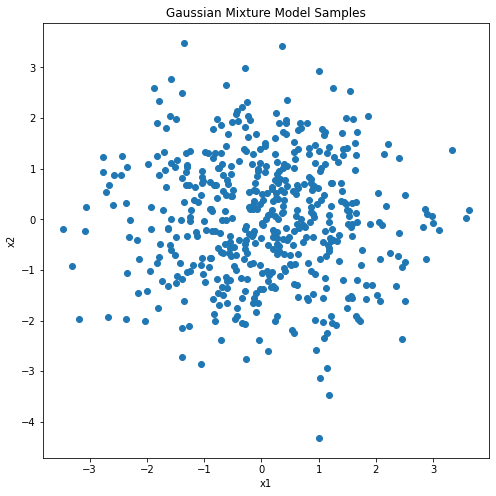

In [13]:
def inv_sigmoid(values):
    return np.log(values/(1-values))

mus = [np.array([0, 1]), np.array([1, 0]), np.array([-1, 0]), np.array([0, -1])]
covs = [np.identity(2), np.identity(2), np.identity(2), np.identity(2)]
pis = np.array([0.25, 0.25, 0.25, 0.25])

n =500
samples = []
acc_pis = [np.sum(pis[:i]) for i in range(1, len(pis)+1)]

for i in range(n):
    # sample uniform
    r = np.random.uniform(0, 1)
    # select gaussian
    k = 0
    for i, threshold in enumerate(acc_pis):
        if r < threshold:
            k = i
            break
    
    selected_mu = mus[k]
    selected_cov = covs[k]

    # sample from selected gaussian
    lambda_, gamma_ = np.linalg.eig(selected_cov)
    
    dimensions = len(lambda_)

    # sampling from normal distribution
    y_s = np.random.uniform(0, 1, size=(dimensions * 1, 3))
    #print(y_s.shape)
    x_normal = np.mean(inv_sigmoid(y_s), axis=1).reshape((-1, dimensions))
    #print(x_normal.shape)
    # transforming into multivariate distribution
    x_multi = (x_normal * lambda_) @ gamma_ + selected_mu
    samples.append(x_multi.tolist()[0])

fig = plt.figure()
samples = np.array(samples)
plt.figure(figsize = (8,8))
plt.scatter(samples[:, 0], samples[:, 1])
plt.title('Gaussian Mixture Model Samples')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

**Describe how the sampling strategy you will use work.**

Gaussian mixture models are formed by multiple multivariate Gaussian distributions with different mean and covariance matrices. With the selected mean and covariance matrix, it is sampled from Gaussian distribution.

**Reference:** Hamacher M. Sampling from Gaussian Mixture Models, 2021, https://medium.com/analytics-vidhya/sampling-from-gaussian-mixture-models-f1ab9cac2721

## Question 2.b

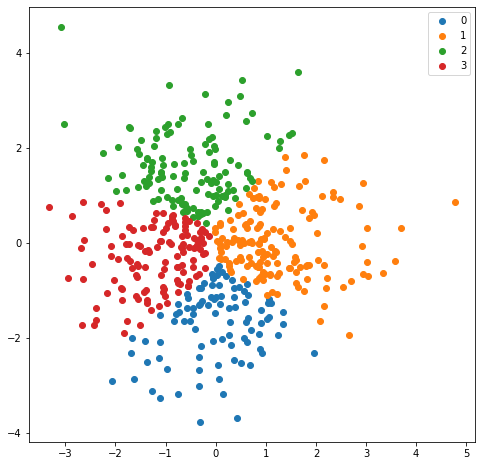

In [22]:
#Loading the required modules

#Defining our function 
def euclidean(x, centroids):
    distances = []
    for centroid in centroids:
        distances.append(np.sqrt(np.sum((centroid - x)**2, axis=1)))
    return np.array(distances).T

def kmeans(x, k, n_iterations):
    # k different randomly centroids are chosen.
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx]
    #Distance of each point to current centroids are calculated using Euclidean distance method.
    distances = euclidean(x, centroids)
    #Each data point is assigned to the closest centroid.
    clusters = []
    for d in distances: 
        clusters.append(np.argmin(d))
    clusters = np.array(clusters)
    
    #Similar work is repeated until predefined repetation occured and all the data points are reassigned.
    for _ in range(n_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[clusters==idx].mean(axis=0) 
            centroids.append(temp_cent)
         
        distances = euclidean(x, centroids)
        clusters = []
        for d in distances: 
            clusters.append(np.argmin(d))
        clusters = np.array(clusters)

    return clusters

label = kmeans(samples,4,1000)
#Visualize the results
plt.figure(figsize = (8,8))
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(samples[label == i , 0] , samples[label == i , 1] , label = i)
plt.legend()
plt.show()

**Is the k-means able to correctly cluster the different components of the mixture?**
Yes, k mean algorithm is successfully clustered different components from the mixture. However, since mean vectors are very close to each other, they look like forming one big blob around (0,0). Even though clusters are not distinct from each other a lot, k-means seperated 4 distributions successfuly.

Since covariance matrices and $\pi$ values are same, the shape of 4 clusters actually very similar. However, center of distributions are determined by mean vectors. From figure, it can be observed that, centroids are approximately found equally to mean vectors which are (0, 1), (1, 0),(-1, 0), (0,-1). It is expected since covariance matrices and $\pi$ values are same.